<html>
 <head>
 </head>
 <body>
          <div class="alert alert-block alert-info" style="color:darkgreen;font-size:20px;text-align:center">
         <b>Machine learning (LSTM Neural Network) and Gaussian Process for time-series forecasting </b>
     </div>
               <p style="text-align:center;font-size:18px"> <b>-</b></p>
     <p style="text-align:center"> Python 2.9</p>
     <br/>
     <a id='content'></a>
     <p style="color:blue"> <b>Contents:</b> </p>
     <a href="#1."> 1. Data</a><br/>
         <a href="#1a"> &emsp; 1.a Polutant</a><br/>
         <a href="#1b"> &emsp; 1.b climate data</a><br/>
      <a href="#2."> 2. Machine learning LSTM</a><br/>
         <a href="#2a"> &emsp; 2.a 1st model: 1-week lag</a><br/>
         <a href="#2b"> &emsp; 2.b 2nd model: 2-week lag</a><br/>
         <a href="#2c"> &emsp; 2.c 3rd model: 1-month lag</a><br/>
     <a href="#3."> 3. Gaussian Process Regressor for forecasting</a><br/>
         <a href="#3a"> &emsp; 3.a periodic kernel</a><br/>
         <a href="#3b"> &emsp; 3.b combined kernels: periodic + linear</a><br/>
         <a href="#3c"> &emsp; 3.c multi kernels</a><br/>
     <a href="#4."> 4. Interactive chart</a><br/>
         <a href="#4a"> &emsp; 4.a LSTM model</a><br/>
         <a href="#4b"> &emsp; 4.b GP model</a><br/>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
     <p style="color:red"> <b>NOTE</b></p>
     <p> &emsp; &#x2022; <u>Hyperlink features</u> for table of content in Github <u>does not work</u> the same way in Jupyter Notebook. <b>Just scroll down !</b></p>
     <p> </p>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
     <p style="color:#8f00ff"> <b>OVERVIEW</b></p>
     <br/>
     <p>This notebook demonstrate the use of powerful machine learning LSTM (long/short-term meomory) neural network and Gaussian Process (GP) for forecasting Air pollution (PM 2.5 concentration) in Jakarta city of Indonesia</p>
     <p> &emsp; &#x2022; Air polution data is monitored by <a href="https://id.usembassy.gov/embassy-consulates/airqualitymonitor/"  target="_blank">US embassy</a></p>
     <p> &emsp; &#x2022; For LSTM forecasting, climate data are used as independent/explanatory variables, while GP is univariate model, forecasted solely using the lag of its value itself</p>
     <p> &emsp; &#x2022; More about data in Section 1.a and 1.b</p>
          <br/>
     <p> &emsp; &#x2022; Published results as an interactive chart is available here at <a href="https://cloud.datapane.com/reports/dA610mk/interactive-chart-machine-learning-lstm-for-forecasting-air-pollution/"  target="_blank">Datapane.com</a></p>
     <p> &emsp; &#x2022; The interactive chart visualise the contrast forecasted PM 2.5 from 3 LSTM models using 3 different lags (1-week beforehand, 2-week, and 4-week/1-month)</p>
     <p> &emsp; &#x2022; In this case, increasing the lag (i.e., using data from 1 month ago to prdict data today) decrease the accuracy of forecasted parameter</p>
     <br/>
 </body>
</html>

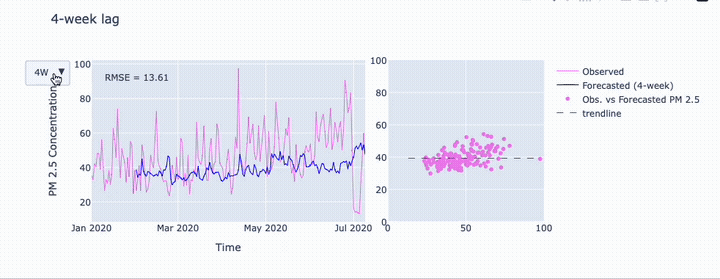

<html>
 <head>
 </head>
 <body>
     <p> <b>Tools</b>: </p>
     <p>&emsp; &#x2022; Tensorflow and scikit-learn for machine learning (LSTM and GP), ee and geemap (by <a href="https://github.com/giswqs"  target="_blank">Qiusheng Wu</a>, optional) for extracting and mapping climate data from Google Earth Engine, and Folum (optional) for interactive chart</p>
     <br/>
     <p> <b>References</b> </p>
     <p>&emsp; &#x2022; for multivariate LSTM neural network: github <a href="https://github.com/gee-community/ee-tensorflow-notebooks/blob/master/streamflow_prediction_lstm/ee_streamflow_prediction_lstm.ipynb"  target="_blank">KMarkert</a>, youtube <a href="https://www.youtube.com/watch?v=tepxdcepTbY&t=1183s"  target="_blank">DigitalSreeni</a>, and blogger <a href="https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/"  target="_blank">Jason Brownlee PhD</a></p>
     <p>&emsp; &#x2022; for gaussian process: Gaussian process by <a href="https://scikit-learn.org/stable/modules/gaussian_process.html#"  target="_blank">sklearn package</a>, and youtube <a href="https://www.youtube.com/watch?v=pskyTMsFnAc"  target="_blank">learndata</a></p>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
          <a id='1.'></a>
     <p style="color:blue;font-size:20px"> 1. Data</p>
     <br/>
     <p> This tutorial is to demonstrate machine learning LSTM (long-short term memory) neural network for forecasting air polution or air quality based on PM2.5 concentration using climate data as predictors/explanatory variables</p>
     <p> &emsp; &#x2022; Air polution data (PM2.5 concentration) is available from <a href="https://id.usembassy.gov/embassy-consulates/airqualitymonitor/"  target="_blank">US embassy</a> for cities acrros the world where US embassies are located, including Jakarta, Indonesia for the year 2017-2020</p>
     <p> &emsp; &#x2022; Ideally, climate data should be also from the sensors installed near the sensor for monitoring pollution, but it is not always the case</p>
     <p> &emsp; &#x2022; Climates data (e.g., precipitation/rainfall, temeperature, wind, etc) is from dataset catalog in Google Earth Engine (<a href="#1b">climate data</a>)</p>
     <br/>
             <a id='1a'></a>
     <p style="color:blue;font-size:18px"> <i>1.a Pollution data</i></p>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
     <p style="color:red">rename the directory</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WD = 'your_path'

In [18]:
# Data is every hour
# the raw data from sensor is 'Raw Conc.'

years = [2017, 2018, 2019, 2020]

for year in years:
    raw_data = pd.read_csv(WD + f'JakartaSouth_PM2.5_{year}_YTD.csv')
    
    if year == years[0]:
        df = raw_data.copy()
    else:
        df = pd.concat([df, raw_data])
    
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Jakarta South,PM2.5 - Principal,2017-01-01 01:00 AM,2017,1,1,1,54.4,148,Unhealthy for Sensitive Groups,115.0,UG/M3,1 Hr,Invalid
1,Jakarta South,PM2.5 - Principal,2017-01-01 02:00 AM,2017,1,1,2,58.1,152,Unhealthy,60.0,UG/M3,1 Hr,Valid
2,Jakarta South,PM2.5 - Principal,2017-01-01 03:00 AM,2017,1,1,3,47.2,130,Unhealthy for Sensitive Groups,39.0,UG/M3,1 Hr,Valid
3,Jakarta South,PM2.5 - Principal,2017-01-01 04:00 AM,2017,1,1,4,43.8,121,Unhealthy for Sensitive Groups,41.0,UG/M3,1 Hr,Valid
4,Jakarta South,PM2.5 - Principal,2017-01-01 05:00 AM,2017,1,1,5,40.8,114,Unhealthy for Sensitive Groups,38.0,UG/M3,1 Hr,Valid


In [20]:
# the missing value is set as -999
# lets replace it with nan

df['Raw Conc.'].where(df['Raw Conc.'] < 200, np.NaN, inplace=True)
df['Raw Conc.'].replace(-999, np.NaN, inplace=True)

# getting the time stamps

df['Date'] = pd.to_datetime(df['Date (LT)'],  format='%Y-%m-%d %I:%M %p')

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Aggregate to daily data</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [24]:
# simlifying the dataframe
df_polt = df[['Date', 'Raw Conc.']]
df_polt.set_index('Date', inplace=True)
df_polt.columns = ['PM25']

# resample to daily data 
df_polt = df_polt.resample(rule='24h').mean()
df_polt.head()

,PM25
Date,
2017-01-01,42.130435
2017-01-02,21.500000
2017-01-03,26.708333
2017-01-04,26.750000
2017-01-05,22.666667


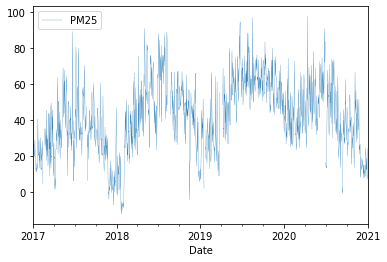

In [25]:
df_polt.plot(y='PM25', use_index=True, linewidth=0.25)
plt.show()

<html>
 <head>
 </head>
 <body>
             <a id='1b'></a>
     <p style="color:blue;font-size:18px"> <i>1.b climate data from Google Earth Engine (GEE)</i></p>
     <p> <b>Datasets</b>:</p>
     <p> There are many image collection of climate datasets in Gogle Earth Engine</p>
     <p> &emsp; &#x2022; <a href="https://developers.google.com/earth-engine/datasets/tags/climate"  target="_blank">Datasets tagged climate in Earth Engine</a></p>
     <p> &emsp; &#x2022; <a href="https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25#description"  target="_blank">GFS: Global Forecast System 384-Hour Predicted Atmosphere Data</a> <font style="color:red">low resolution (27830 m)</font></p>
     <p> &emsp; &#x2022; Youtube <a href="https://www.youtube.com/watch?v=qqkNMyCCf_0"  target="_blank">Download Climate Data from Climate Engine</a></p>
     <p> &emsp; &#x2022; <a href="https://docs.google.com/document/d/1e687DNw5zVborlOcQsiNUvdrEWAI1T-hjcBplVMippA/edit"  target="_blank">Google Earth Engine: Analyzing Precipitation Data</a> using <a href="https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_PENTAD#bands"  target="_blank">"UCSB-CHG/CHIRPS/PENTAD"</a></p>
     <p> &emsp; &#x2022; <a href="https://docs.google.com/document/d/1WDxMR5UpxqiTB4GsJcdP9AB0hP-Z8oaX-O9akBg2PZ0/edit"  target="_blank">Google Earth Engine: Analyzing Land Surface Temperature Data</a></p>
     <p> &emsp; &#x2022; Temperature, dewpoint, precipitation, surface pressure, wind <a href="https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_DAILY"  target="_blank">ERA5 Daily Aggregates - Latest Climate Reanalysis Produced by ECMWF / Copernicus Climate Change Service</a>. <font style="color:red">only until 2020-07-09, low resolution (27830 m)</font></p>
     <br/>
     <p> Indonesian climate agency <a href="https://dataonline.bmkg.go.id/home"  target="_blank">BMKG</a></p>
     <p> </p>
     <br/>
 </body>
</html>

In [26]:
import ee
import geemap

ee.Initialize()

import geopandas as gpd

In [27]:
# get the vector of Indonesia
JKT = gpd.read_file('Jakarta.shp')
roi = geemap.geopandas_to_ee(JKT)

In [28]:
def clipcol(image):
    clipimage = image.clip(roi)
    return clipimage

import datetime
from datetime import date

def waktu_satelit(waktu):
    temp = datetime.datetime.fromtimestamp(waktu/1000).strftime('%Y-%m-%d %H:%M:%S')
    return(temp)

In [31]:
Map=geemap.Map()
Map.centerObject(roi, 10);
Map

Map(center=[-6.208739538323729, 106.83864959132586], controls=(WidgetControl(options=['position', 'transparent…

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Load the climate dataset from GEE</p>
      <p> &emsp; &#x2022; <a href="https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_DAILY"  target="_blank">ERA5 Daily Aggregates - Latest Climate Reanalysis Produced by ECMWF / Copernicus Climate Change Service</a> <font style="color:red">only until 2020-07-09</font></p>
     <p> &emsp; &#x2022; check the sites above for description of available bands and its units</p>
     <br/>
 </body>
</html>

In [29]:
bands_clim = ['total_precipitation','minimum_2m_air_temperature','maximum_2m_air_temperature',
              'dewpoint_2m_temperature', 'surface_pressure',
              'u_component_of_wind_10m','v_component_of_wind_10m']

start_date = '2017-01-01'
end_date = '2020-12-31'

dt_clim = (ee.ImageCollection("ECMWF/ERA5/DAILY")
        .filterBounds(roi).map(clipcol)
        .filterDate(start_date, end_date)
          .select(bands_clim))

In [37]:
waktu_akusisi = dt_clim.aggregate_array('system:time_start').getInfo()
waktu_akusisi = [waktu_satelit(x) for x in waktu_akusisi]
#waktu_akusisi

In [32]:
tempr_param = {'bands':'minimum_2m_air_temperature', 'min': 220, 'max': 300, 
               'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000']}
Map.addLayer(dt_clim.first(), tempr_param, "Temperature (K)")

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Transform image collection into time-series dataframe</p>
      <p> &emsp; &#x2022; if there are multiple pixels, aggregate by id</p>
     <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [33]:
# we use the scale of 30000 which is just above the resolution of ERA5
dt_clim_tmp = dt_clim.getRegion(roi,30000).getInfo()
dt_clim_Df = pd.DataFrame(dt_clim_tmp[1:])
dt_clim_Df.columns = dt_clim_tmp[0]
dt_clim_Df.head()

,id,longitude,latitude,time,total_precipitation,minimum_2m_air_temperature,maximum_2m_air_temperature,dewpoint_2m_temperature,surface_pressure,u_component_of_wind_10m,v_component_of_wind_10m
0,20170101,106.854603,-6.333123,1483228800000,0.003921,298.143616,304.858765,296.936432,100360.500000,2.095950,0.610509
1,20170102,106.854603,-6.333123,1483315200000,0.001637,299.093506,305.376465,296.772797,100401.289062,2.349067,1.129220
2,20170103,106.854603,-6.333123,1483401600000,0.017704,297.623505,304.382721,297.320679,100344.601562,1.408045,-0.593468
3,20170104,106.854603,-6.333123,1483488000000,0.017588,297.462067,302.576935,297.102173,100376.031250,0.820845,-0.802953
4,20170105,106.854603,-6.333123,1483574400000,0.003128,296.894165,303.578918,297.087555,100370.539062,0.530518,-0.538587


In [34]:
# in this case, seems there is only 1 pixel that covers the entire our ROI
# if there are more than one pixels, then data need to be aggregated

dt_clim_Df = dt_clim_Df.groupby(by='id')\
    .agg({'total_precipitation':'mean',
          'minimum_2m_air_temperature':'mean',
          'maximum_2m_air_temperature':'mean',
          'dewpoint_2m_temperature':'mean',
          'surface_pressure':'mean',
          'u_component_of_wind_10m':'mean',
          'v_component_of_wind_10m':'mean',
          'time':'mean'
         }) 

dt_clim_Df.index = pd.to_datetime(dt_clim_Df['time']*1e6)
dt_clim_Df.index.name = 'datetime'
dt_clim_Df.drop(['time'],axis=1,inplace=True)

newCols = ['precip','tmin','tmax','dew', 'press', 'uwind','vwind']
dt_clim_Df.columns = newCols
dt_clim_Df.head()

,precip,tmin,tmax,dew,press,uwind,vwind
datetime,,,,,,,
2017-01-01,0.003921,298.143616,304.858765,296.936432,100360.500000,2.095950,0.610509
2017-01-02,0.001637,299.093506,305.376465,296.772797,100401.289062,2.349067,1.129220
2017-01-03,0.017704,297.623505,304.382721,297.320679,100344.601562,1.408045,-0.593468
2017-01-04,0.017588,297.462067,302.576935,297.102173,100376.031250,0.820845,-0.802953
2017-01-05,0.003128,296.894165,303.578918,297.087555,100370.539062,0.530518,-0.538587


<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Merging the pollutan and climate data</p>
      <p> &emsp; &#x2022; both data are now in daily time series, and the timestamp is already set as index at both dataframe</p>
     <br/>
 </body>
</html>

In [35]:
dt_clim_Df = dt_clim_Df.join(df_polt)
dt_clim_Df.head()

,precip,tmin,tmax,dew,press,uwind,vwind,PM25
datetime,,,,,,,,
2017-01-01,0.003921,298.143616,304.858765,296.936432,100360.500000,2.095950,0.610509,42.130435
2017-01-02,0.001637,299.093506,305.376465,296.772797,100401.289062,2.349067,1.129220,21.500000
2017-01-03,0.017704,297.623505,304.382721,297.320679,100344.601562,1.408045,-0.593468,26.708333
2017-01-04,0.017588,297.462067,302.576935,297.102173,100376.031250,0.820845,-0.802953,26.750000
2017-01-05,0.003128,296.894165,303.578918,297.087555,100370.539062,0.530518,-0.538587,22.666667


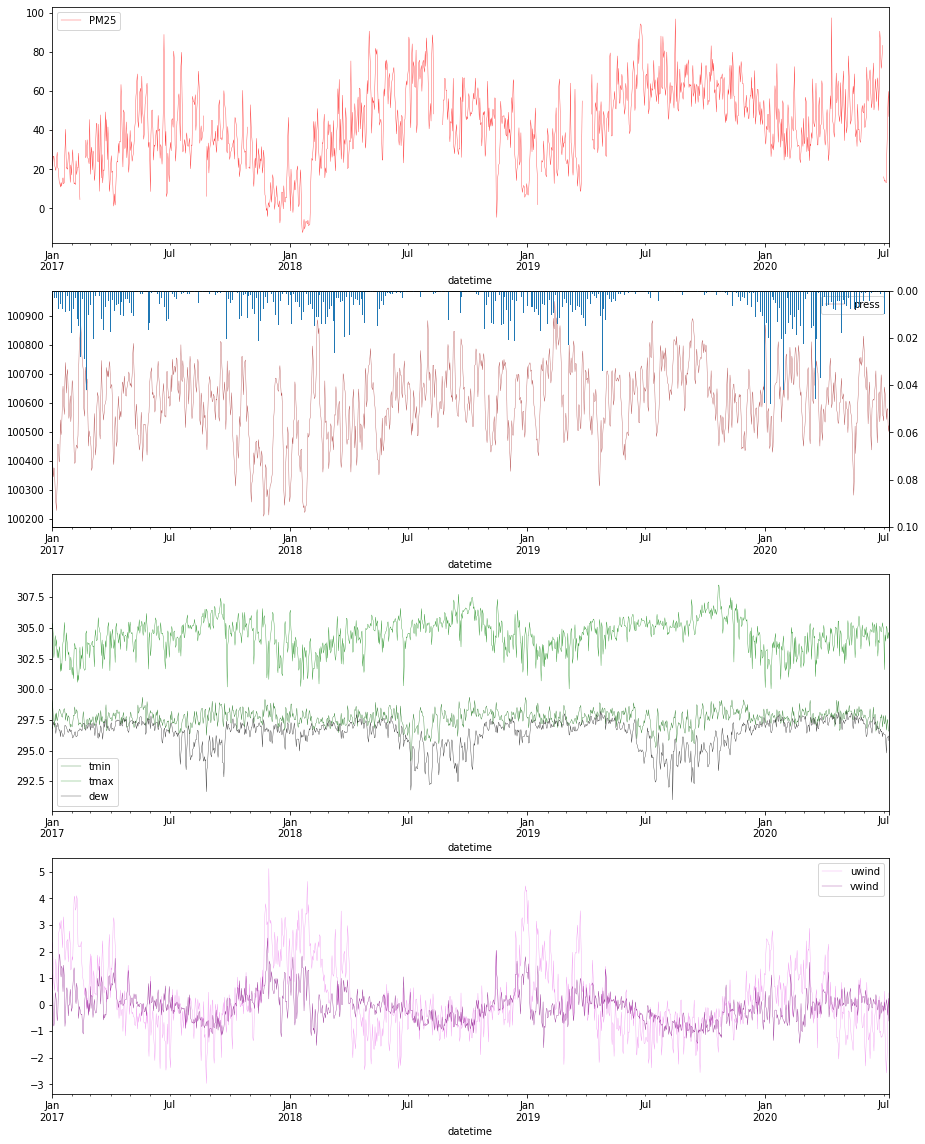

In [36]:
urutan = [0, 2, 2, 2, 1, 3, 3, 0]
warna = ['blue', 'darkgreen', 'green', 'black', 'brown', 'violet', 'purple', 'red']

fig, ax = plt.subplots(nrows=4, figsize=(15, 20))

for i in range(8):
    
    if dt_clim_Df.columns[i] == 'precip':
        ax1 = ax[1].twinx()
        ax1.bar(dt_clim_Df.index, dt_clim_Df['precip'], width = 0.5)
        ax1.invert_yaxis()
        ax1.set_ylim([0.1, 0])
    else:
        dt_clim_Df.plot(y=dt_clim_Df.columns[i], use_index=True, linewidth=0.3, 
                    color = warna[i], ax=ax[urutan[i]])

plt.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Dealing with missing values</p>
      <p> &emsp; &#x2022; this is just a demonstration, so lets just fill in the missing values by interpolation</p>
     <br/>
 </body>
</html>

In [37]:
dt_clim_Df.isnull().sum()

precip     0
tmin       0
tmax       0
dew        0
press      0
uwind      0
vwind      0
PM25      42
dtype: int64

In [38]:
dt_clim_Df['PM25'].interpolate(inplace=True)
dt_clim_Df.isnull().sum()

precip    0
tmin      0
tmax      0
dew       0
press     0
uwind     0
vwind     0
PM25      0
dtype: int64

In [70]:
dt_clim_Df.to_csv(WD + 'polutan_climate_jakarta.csv')

<html>
 <head>
 </head>
 <body>
     <a id='2.'></a>
     <p style="color:blue;font-size:20px"> 2. Machine learning LSTM </p>
     <br/>
             <a id='2a'></a>
     <p style="color:blue;font-size:18px"> <i>2.a 1st model: 1-week lag </i></p>
     <p>In this simple model, we only use 1-week (7-day) lag of all variables, including the polutan PM2.5 itself, for the inputs</p>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">formating the data inputs</p>
      <p> &emsp; &#x2022; the activation functions such as sigmoid and tanh are sensitive to magnitude, so lets scaling the values</p>
     <p> &emsp; &#x2022; data from 2017-2019 are for training, and data from 2020 for testing</p>
     <p style="color:red"> &emsp; &#x2022; for some reason, invers scaling does not work, so only scaling for training features (X), not included the label (Y)</p>
     <br/>
 </body>
</html>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WD = '/Users/ismail/Documents/Data/Indonesia/climate/pollution/'

In [2]:
dt_clim_Df = pd.read_csv(WD + 'polutan_climate_jakarta.csv')

# convert the datetime to datformat
dt_clim_Df['datetime'] = pd.to_datetime(dt_clim_Df['datetime'])
dt_clim_Df.set_index('datetime', inplace=True)

# split data for training and testing
df_training = dt_clim_Df['2017-01-01':'2019-12-31']
df_forecast = dt_clim_Df['2020-01-01':'2020-12-31']

In [3]:
from sklearn.preprocessing import StandardScaler

featureColumns = ['precip','tmin','tmax','dew', 'press', 'uwind','vwind']
labelColumns = ['PM25']
y_idx = dt_clim_Df.columns.tolist().index(labelColumns[0])

scaler = StandardScaler()
scaler = scaler.fit(df_training)
dt_clim_scaled = scaler.transform(df_training)

# rescale the y
dt_clim_scaled[:,y_idx] = df_training[labelColumns[0]].tolist()

In [4]:
trainX = []
trainY = []


day_future = 1   # predict 1 day ahead
day_past = 7  # 1 week beforehand

for i in range(day_past, len(dt_clim_scaled) - day_future +1):
    trainX.append(dt_clim_scaled[i - day_past:i, 0:dt_clim_scaled.shape[1]])
    trainY.append(dt_clim_scaled[i + day_future - 1:i + day_future, y_idx])

trainX, trainY = np.array(trainX), np.array(trainY)

In [11]:
trainX.shape, trainY.shape

((1088, 7, 8), (1088, 1))

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">building the LSTM model</p>
      <p> &emsp; &#x2022; nodes 64 and 32 seems standar options for LSTM</p>
     <p> &emsp; &#x2022; adding <b>Dropout</b> layer is useful to avoid overfitting (ref. <a href="https://www.youtube.com/watch?v=p3CcfIjycBA"  target="_blank">DigitalSreeni</a>)</p>
     <br/>
 </body>
</html>

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [6]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             18688     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31,137
Trainable params: 31,137
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
62/62 [==============================] - 8s 115ms/step - loss: 362.1148 - val_loss: 118.8867
Epoch 2/10
62/62 [==============================] - 7s 110ms/step - loss: 177.3445 - val_loss: 109.5537
Epoch 3/10
62/62 [==============================] - 7s 111ms/step - loss: 161.2159 - val_loss: 102.9332
Epoch 4/10
62/62 [==============================] - 7s 110ms/step - loss: 146.5961 - val_loss: 84.1358
Epoch 5/10
62/62 [==============================] - 7s 111ms/step - loss: 150.2639 - val_loss: 86.2763
Epoch 6/10
62/62 [==============================] - 7s 111ms/step - loss: 147.8821 - val_loss: 111.5519
Epoch 7/10
62/62 [==============================] - 7s 110ms/step - loss: 142.9293 - val_loss: 111.8529
Epoch 8/10
62/62 [==============================] - 7s 110ms/step - loss: 142.7494 - val_loss: 129.4073
Epoch 9/10
62/62 [==============================] - 7s 110ms/step - loss: 138.0061 - val_loss: 115.8287
Epoch 10/10
62/62 [==============================] - 7s 110ms/step

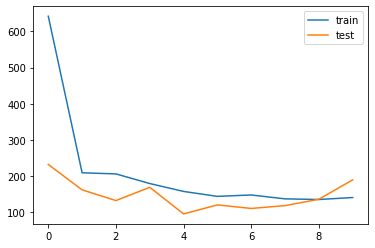

In [56]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:#8f00ff"> <b>Note</b></p>
     <p> &emsp; &#x2022; the training loss and validation loss meet at the end, but the value are not the best</p>
     <p> &emsp; &#x2022; afterall, we use <b>RS data which has very low resolution</b> to predict one-point ground measurement, so user should <b>not expect high accuracy</b></p>
     <p> &emsp; &#x2022; remote sensing has higher spatial resolution than ground measurement in trade of its lower accuracy</p>
     <p> &emsp; &#x2022; using longer observation (multi-years) data improve the training quality, or use longer lags, e.g., 1-month (31-day) lag as in section <a href="#2c">2.c 3rd model with 1-month lag</a></p>
     <p> &emsp; &#x2022; may be wee need to take several ground measurements in jakarta and make aggregate</p>
     <p> &emsp; &#x2022; changing the hyperparameter, e.g., epoch, may improve the results, but not necessarily</p>
     <p> &emsp; &#x2022; however, even when you re-execute the model training, you may get different result, even when not changing any hyperparameter</p>
     <p> &emsp; &#x2022; adding <b>dropout</b> in the model is usefull to improve the validation</p>
     <p> &emsp; &#x2022; How to interprete training/validation-loss curve by <a href="https://www.youtube.com/watch?v=p3CcfIjycBA"  target="_blank">DigitalSreeni</a></p>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Forecast for 2022</p>
      <p> &emsp; &#x2022; we also need to scale the testing data for forecasting</p>
     <br/>
 </body>
</html>

In [8]:
dt_clim_test_scaled = scaler.transform(df_forecast)
dt_clim_test_scaled[:,y_idx] = df_forecast[labelColumns[0]].tolist()

testingX = []
testingY = []

for i in range(day_past, len(dt_clim_test_scaled) - day_future +1):
    testingX.append(dt_clim_test_scaled[i - day_past:i, 0:dt_clim_test_scaled.shape[1]])
    testingY.append(dt_clim_test_scaled[i + day_future - 1:i + day_future, y_idx])

testingX, testingY = np.array(testingX), np.array(testingY)
testingX.shape, testingY.shape

((184, 7, 8), (184, 1))

In [9]:
y_pred = model.predict(testingX)

y_pred = np.squeeze(y_pred) 
y_test = np.squeeze(testingY) 

6/6 [==============================] - 0s 20ms/step


<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Evaluating the forecasted PM 2.5 concentration</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [10]:
# evaluating the forecasting
rmse = np.mean(np.sqrt(np.power((y_test-y_pred),2)))
nse = 1-(np.sum(np.power((y_test-y_pred),2))/np.sum(np.power((y_test-y_test.mean()),2)))

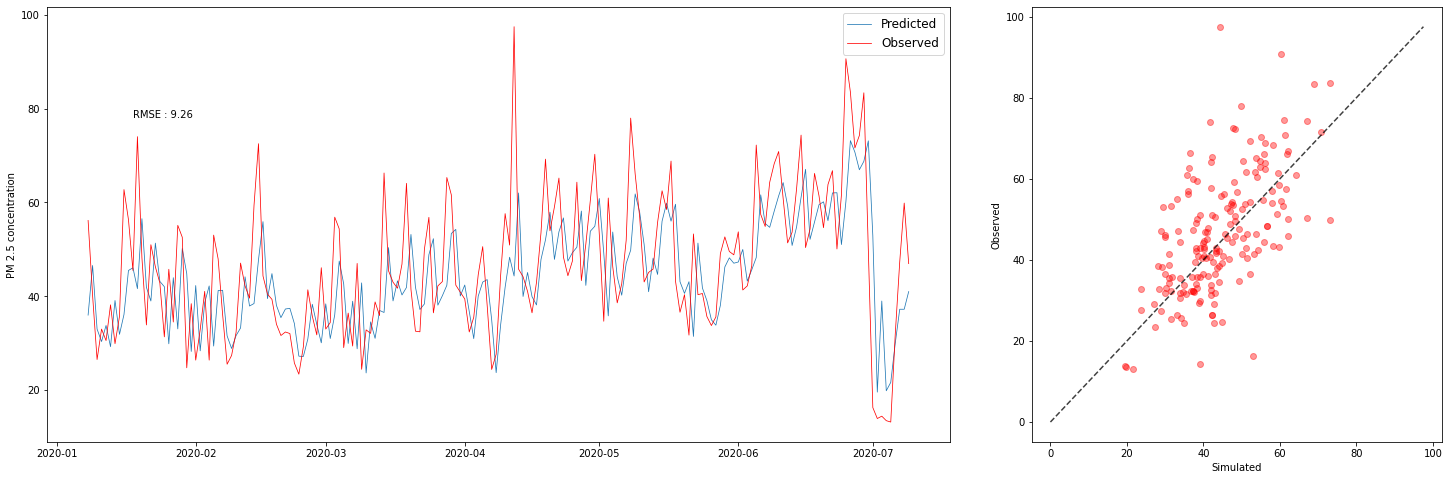

In [11]:
forecast_dates = df_forecast.index[day_past:]

fig = plt.figure(figsize=(25,8))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(forecast_dates, y_pred, linewidth=0.75, label='Predicted')
ax1.plot(forecast_dates, y_test, linewidth=0.75, color='red', label='Observed')
ax1.annotate('RMSE : '+str(round(rmse,2)), xy =(forecast_dates[10], 0.8*y_test.max()))
ax1.set_ylabel('PM 2.5 concentration')
ax1.legend(fontsize=12)

ax2 = fig.add_subplot(gs[0, 2:])
ax2.plot(y_pred,y_test,'o',alpha=0.4, color='red')
ax2.plot([0,y_test.max()],[0,y_test.max()],'k--',alpha=0.75)
ax2.set_xlabel('Simulated')
ax2.set_ylabel('Observed')

plt.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:#8f00ff"> <b>Results</b></p>
     <p> &emsp; &#x2022; Predicted data pick the temporal resolution of observed data, i.e., they have linear positive correlation</p>
     <p> &emsp; &#x2022; However, predicted data overall underestimate the observed data, particualrly at high PM 2.5 concentration (spike/sudden jump)</p>
     <p> &emsp; &#x2022; <code>RMSE = 11.58</code> which is around 10% of the mean</p>
     <br/>
 </body>
</html>

In [15]:
pd.DataFrame(data={'date':forecast_dates, 'PM25_1W':y_pred}).to_csv('temp_lstm_result_1week.csv', index=False)

<html>
 <head>
 </head>
 <body>
             <a id='2b'></a>
     <p style="color:blue;font-size:18px"> <i>2.b 2nd model: 2-week lag </i></p>
     <p>In this model, we use 2-week (14-day) lag of all variables, including the polutan PM2.5 itself, for the inputs</p>
     <p>Let see if we have better results</p>
     <br/>
 </body>
</html>

In [16]:
dt_clim_Df = pd.read_csv(WD + 'polutan_climate_jakarta.csv')

# convert the datetime to datformat
dt_clim_Df['datetime'] = pd.to_datetime(dt_clim_Df['datetime'])
dt_clim_Df.set_index('datetime', inplace=True)

# split data for training and testing
df_training = dt_clim_Df['2017-01-01':'2019-12-31']
df_forecast = dt_clim_Df['2020-01-01':'2020-12-31']

featureColumns = ['precip','tmin','tmax','dew', 'press', 'uwind','vwind']
labelColumns = ['PM25']
y_idx = dt_clim_Df.columns.tolist().index(labelColumns[0])

scaler = StandardScaler()
scaler = scaler.fit(df_training)
dt_clim_scaled = scaler.transform(df_training)

# rescale the y
dt_clim_scaled[:,y_idx] = df_training[labelColumns[0]].tolist()

trainX = []
trainY = []


day_future = 1   # predict 1 day ahead
day_past = 14  # 1 week beforehand

for i in range(day_past, len(dt_clim_scaled) - day_future +1):
    trainX.append(dt_clim_scaled[i - day_past:i, 0:dt_clim_scaled.shape[1]])
    trainY.append(dt_clim_scaled[i + day_future - 1:i + day_future, y_idx])

trainX, trainY = np.array(trainX), np.array(trainY)

trainX.shape, trainY.shape

((1081, 14, 8), (1081, 1))

In [17]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            18688     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,137
Trainable params: 31,137
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
61/61 [==============================] - 24s 381ms/step - loss: 587.3485 - val_loss: 374.1686
Epoch 2/10
61/61 [==============================] - 22s 364ms/step - loss: 299.9703 - val_loss: 100.2347
Epoch 3/10
61/61 [==============================] - 22s 366ms/step - loss: 244.2886 - val_loss: 207.1853
Epoch 4/10
61/61 [==============================] - 22s 367ms/step - loss: 230.2970 - val_loss: 91.4659
Epoch 5/10
61/61 [==============================] - 22s 368ms/step - loss: 213.8104 - val_loss: 100.6135
Epoch 6/10
61/61 [==============================] - 23s 369ms/step - loss: 219.5872 - val_loss: 148.9806
Epoch 7/10
61/61 [==============================] - 22s 368ms/step - loss: 279.2114 - val_loss: 174.7202
Epoch 8/10
61/61 [==============================] - 22s 367ms/step - loss: 245.9048 - val_loss: 205.8772
Epoch 9/10
61/61 [==============================] - 23s 369ms/step - loss: 219.4193 - val_loss: 87.8000
Epoch 10/10
61/61 [==============================] - 22s 

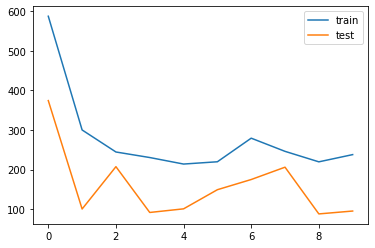

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [20]:
dt_clim_test_scaled = scaler.transform(df_forecast)
dt_clim_test_scaled[:,y_idx] = df_forecast[labelColumns[0]].tolist()

testingX = []
testingY = []

for i in range(day_past, len(dt_clim_test_scaled) - day_future +1):
    testingX.append(dt_clim_test_scaled[i - day_past:i, 0:dt_clim_test_scaled.shape[1]])
    testingY.append(dt_clim_test_scaled[i + day_future - 1:i + day_future, y_idx])

testingX, testingY = np.array(testingX), np.array(testingY)

y_pred = model.predict(testingX)

y_pred = np.squeeze(y_pred) 
y_test = np.squeeze(testingY) 

6/6 [==============================] - 0s 42ms/step


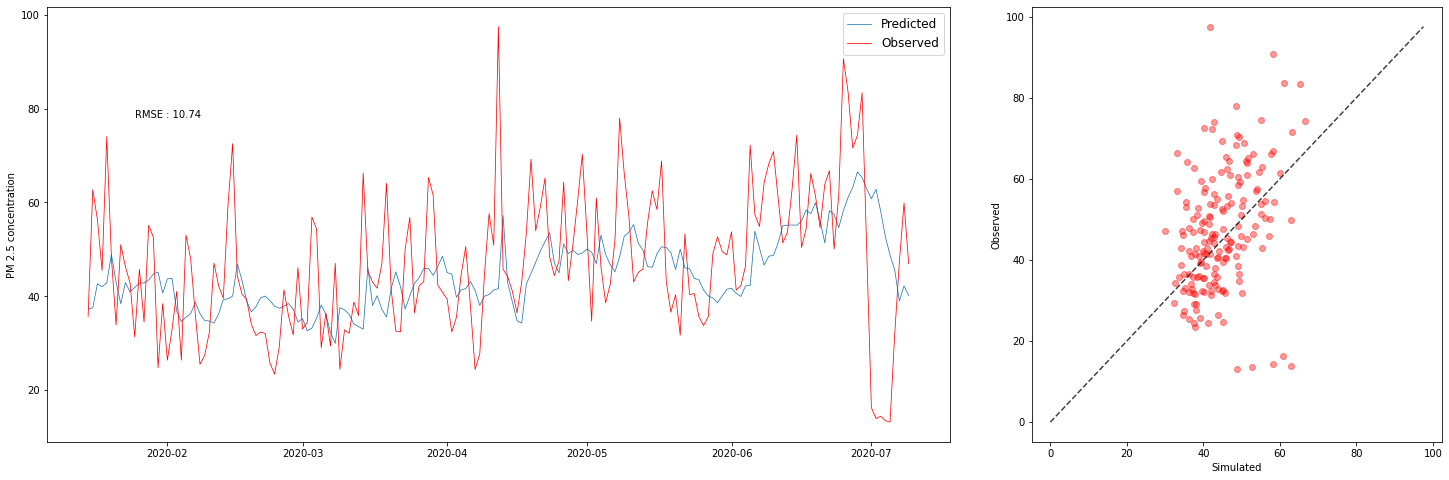

In [21]:
# evaluating the forecasting
rmse = np.mean(np.sqrt(np.power((y_test-y_pred),2)))
nse = 1-(np.sum(np.power((y_test-y_pred),2))/np.sum(np.power((y_test-y_test.mean()),2)))

forecast_dates = df_forecast.index[day_past:]

fig = plt.figure(figsize=(25,8))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(forecast_dates, y_pred, linewidth=0.75, label='Predicted')
ax1.plot(forecast_dates, y_test, linewidth=0.75, color='red', label='Observed')
ax1.annotate('RMSE : '+str(round(rmse,2)), xy =(forecast_dates[10], 0.8*y_test.max()))
ax1.set_ylabel('PM 2.5 concentration')
ax1.legend(fontsize=12)

ax2 = fig.add_subplot(gs[0, 2:])
ax2.plot(y_pred,y_test,'o',alpha=0.4, color='red')
ax2.plot([0,y_test.max()],[0,y_test.max()],'k--',alpha=0.75)
ax2.set_xlabel('Simulated')
ax2.set_ylabel('Observed')

plt.show()

In [22]:
pd.DataFrame(data={'date':forecast_dates, 'PM25_2W':y_pred}).to_csv('temp_lstm_result_2week.csv', index=False)

<html>
 <head>
 </head>
 <body>
             <a id='2c'></a>
     <p style="color:blue;font-size:18px"> <i>2.c 3rd model: 1-month lag </i></p>
     <p>In this model, we use 1-month (31-day) lag of all variables, including the polutan PM2.5 itself, for the inputs</p>
     <p>Let see if we have better results</p>
     <br/>
 </body>
</html>

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [23]:
day_future = 1   
day_past = 31  

dt_clim_Df = pd.read_csv(WD + 'polutan_climate_jakarta.csv')

# convert the datetime to datformat
dt_clim_Df['datetime'] = pd.to_datetime(dt_clim_Df['datetime'])
dt_clim_Df.set_index('datetime', inplace=True)

# split data for training and testing
df_training = dt_clim_Df['2017-01-01':'2019-12-31']
df_forecast = dt_clim_Df['2020-01-01':'2020-12-31']

featureColumns = ['precip','tmin','tmax','dew', 'press', 'uwind','vwind']
labelColumns = ['PM25']
y_idx = dt_clim_Df.columns.tolist().index(labelColumns[0])

scaler = StandardScaler()
scaler = scaler.fit(df_training)
dt_clim_scaled = scaler.transform(df_training)

# rescale the y
dt_clim_scaled[:,y_idx] = df_training[labelColumns[0]].tolist()

trainX = []
trainY = []




for i in range(day_past, len(dt_clim_scaled) - day_future +1):
    trainX.append(dt_clim_scaled[i - day_past:i, 0:dt_clim_scaled.shape[1]])
    trainY.append(dt_clim_scaled[i + day_future - 1:i + day_future, y_idx])

trainX, trainY = np.array(trainX), np.array(trainY)

trainX.shape, trainY.shape

((1064, 31, 8), (1064, 1))

In [24]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 31, 64)            18688     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,137
Trainable params: 31,137
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
60/60 [==============================] - 98s 2s/step - loss: 1232.0663 - val_loss: 546.8729
Epoch 2/5
60/60 [==============================] - 97s 2s/step - loss: 503.2709 - val_loss: 295.3188
Epoch 3/5
60/60 [==============================] - 97s 2s/step - loss: 561.0383 - val_loss: 520.8073
Epoch 4/5
60/60 [==============================] - 97s 2s/step - loss: 440.0513 - val_loss: 195.7007
Epoch 5/5
60/60 [==============================] - 95s 2s/step - loss: 416.1974 - val_loss: 190.4770


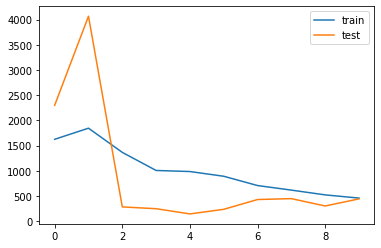

In [77]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
dt_clim_test_scaled = scaler.transform(df_forecast)
dt_clim_test_scaled[:,y_idx] = df_forecast[labelColumns[0]].tolist()

testingX = []
testingY = []

for i in range(day_past, len(dt_clim_test_scaled) - day_future +1):
    testingX.append(dt_clim_test_scaled[i - day_past:i, 0:dt_clim_test_scaled.shape[1]])
    testingY.append(dt_clim_test_scaled[i + day_future - 1:i + day_future, y_idx])

testingX, testingY = np.array(testingX), np.array(testingY)
testingX.shape, testingY.shape

((160, 31, 8), (160, 1))

In [27]:
y_pred = model.predict(testingX)

y_pred = np.squeeze(y_pred) 
y_test = np.squeeze(testingY) 

5/5 [==============================] - 1s 97ms/step


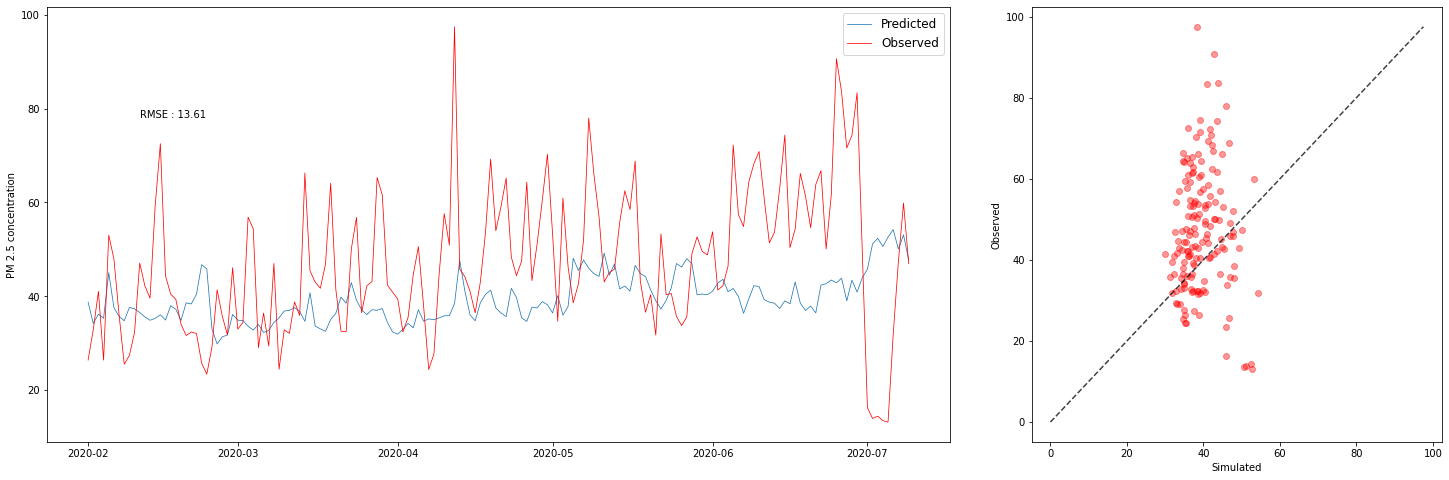

In [28]:
# evaluating the forecasting
rmse = np.mean(np.sqrt(np.power((y_test-y_pred),2)))
nse = 1-(np.sum(np.power((y_test-y_pred),2))/np.sum(np.power((y_test-y_test.mean()),2)))

forecast_dates = df_forecast.index[day_past:]

fig = plt.figure(figsize=(25,8))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(forecast_dates, y_pred, linewidth=0.75, label='Predicted')
ax1.plot(forecast_dates, y_test, linewidth=0.75, color='red', label='Observed')
ax1.annotate('RMSE : '+str(round(rmse,2)), xy =(forecast_dates[10], 0.8*y_test.max()))
ax1.set_ylabel('PM 2.5 concentration')
ax1.legend(fontsize=12)

ax2 = fig.add_subplot(gs[0, 2:])
ax2.plot(y_pred,y_test,'o',alpha=0.4, color='red')
ax2.plot([0,y_test.max()],[0,y_test.max()],'k--',alpha=0.75)
ax2.set_xlabel('Simulated')
ax2.set_ylabel('Observed')

plt.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:#8f00ff"> <b>Results</b></p>
     <p> &emsp; &#x2022; The result using 1-month lag is worse than the result from 1-week lag; <code>RMSE = 15.1</code>, which is hgiher than the previous RMSE</p>
     <p> &emsp; &#x2022; While extending the lag caomplicate the model and take more time to train, the model is not necessarily beter</p>
     <br/>
 </body>
</html>

In [29]:
pd.DataFrame(data={'date':forecast_dates, 'PM25_4W':y_pred}).to_csv('temp_lstm_result_4week.csv', index=False)

<html>
 <head>
 </head>
 <body>
     <a id='3.'></a>
     <p style="color:blue;font-size:20px"> 3. Gaussian process (GP)</p>
     <br/>
     <p> &emsp; &#x2022; GP can be used to make long-term forecasting based merely in the data itself (using lags)</p>
     <p> &emsp; &#x2022; data from climate will not be used for forecasting by GP</p>
     <p> &emsp; &#x2022; hence, the output is general trend of future air quality, not necessarily prcise estimate</p>
     <br>
             <a id='3a'></a>
     <p style="color:blue;font-size:18px"> <i>3.a periodic kernel</i></p>
     <p></p>
     <br/>
 </body>
</html>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WD = '/Users/ismail/Documents/Data/Indonesia/climate/pollution/'

In [56]:
dt_clim_Df = pd.read_csv(WD + 'polutan_climate_jakarta.csv')

dt_clim_Df['datetime'] = pd.to_datetime(dt_clim_Df['datetime'])
dt_clim_Df.set_index('datetime', inplace=True)

dt_clim_Df.drop(dt_clim_Df.tail(10).index,inplace=True)

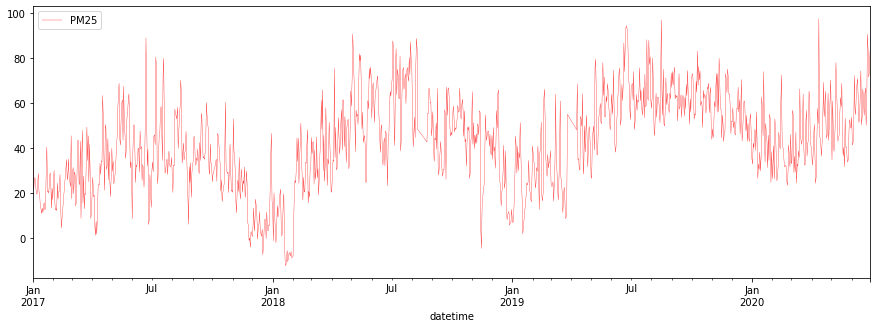

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))

dt_clim_Df.plot(y='PM25', use_index=True, linewidth=0.3, 
                    color = 'red', ax=ax)

plt.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:#8f00ff"> <b>Note</b></p>
     <p> &emsp; &#x2022; clearly there is seasonal patern when PM 2.5 concentration is high in mid year (july)</p>
     <p> &emsp; &#x2022; there is also long-term general trend of increasing PM 2.5 concentration from 2017 to 2020</p>
     <p> &emsp; &#x2022; understanding these trend will help us to identify proper <b>kernel</b> for forecasting</p>
     <p> &emsp; &#x2022; for example, periodic kernel (ExpSineSquared in sklearn) is good for time-series data with period trend such as seasonal data</p>
     <p> &emsp; &#x2022; nevertheless, we can try all the kernel availables in sklearn package: RBF, RationalQuadratic, ExpSineSquared, Dotproduct, matern (ref. <a href="https://scikit-learn.org/stable/modules/gaussian_process.html#kernels-for-gaussian-processes"  target="_blank">sklearn GP kernels in sklearn</a>)</p>
     <br/>
 </body>
</html>

In [17]:
from sklearn.gaussian_process import kernels, GaussianProcessRegressor

gp_kernel = [kernels.RBF(),
          kernels.RationalQuadratic(),
          kernels.ExpSineSquared(periodicity=10.0),
          kernels.DotProduct(sigma_0=1.0)**2,
          kernels.Matern()]

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Lest try the preiodic (ExpSineSquared) kernel</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [58]:
gp = GaussianProcessRegressor(kernel=kernels.ExpSineSquared(periodicity=10.0))

X = np.linspace(0, len(dt_clim_Df.PM25), len(dt_clim_Df.PM25)).reshape(-1,1)
y = np.array(dt_clim_Df.PM25)

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">fitting with GP model</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [59]:
gp.fit(X, y)

print("\nLearned kernel:", gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: ExpSineSquared(length_scale=0.996, periodicity=10)
Log-marginal-likelihood: -1767397638258528.250


<html>
 <head>
 </head>
 <body>
     <p style="color:brown">forecasting for 1 year ahead</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [60]:
X_ = np.linspace(X.min(), X.max()+356, len(dt_clim_Df.PM25)+356)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

In [61]:
X_date = np.append(dt_clim_Df.index, 
          pd.date_range(start=dt_clim_Df.index[-1]+pd.DateOffset(1), 
              periods=356, freq='D'))

len(X_date)

1632

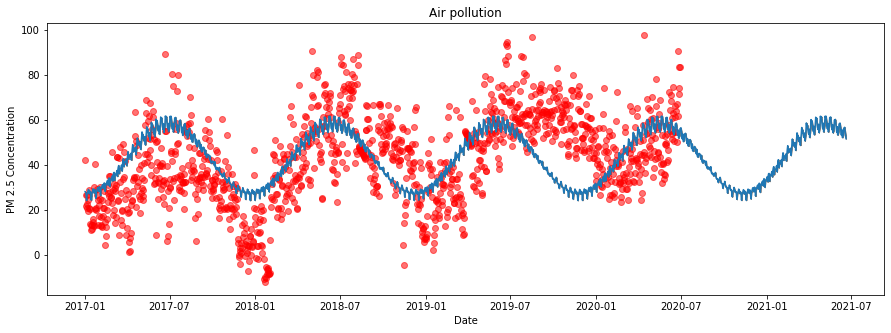

In [62]:
# Plot
fig = plt.figure(figsize=(15,5))
plt.plot(dt_clim_Df.index, y, 'o', color='red', alpha=0.55)
plt.plot(X_date, y_pred)
plt.fill_between(X_date, y_pred-y_std, y_pred+y_std, alpha=0.5, color='k')
#plt.xlim(X_.min(), X_.max())
plt.xlabel("Date")
plt.ylabel("PM 2.5 Concentration")
plt.title("Air pollution")
plt.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:#8f00ff"> <b>Results</b></p>
     <p> &emsp; &#x2022; GP model with periodi kernel pick the seasonal variation </p>
     <p> &emsp; &#x2022; however, it only fit at the beginning, in 2017 and 2018</p>
     <p> &emsp; &#x2022; at later stage, GP model underestimate the observed PM 2.5</p>
     <p> &emsp; &#x2022; this because or GP model is built solely using 1 periodic kernel</p>
     <p> &emsp; &#x2022; lets add linear kernel to pick up the increasing trend of PM 2.5 concentration from 2019</p>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
             <a id='3b'></a>
     <p style="color:blue;font-size:18px"> <i>3.b combined kernels: period + linear</i></p>
     <p> &emsp; &#x2022; from section , we want to add linear kernel to our GP model </p>
     <p> &emsp; &#x2022; in sklearn, the linear kernel is provided by Dotproduct (ref. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.DotProduct.html"  target="_blank">sklearn</a> and <a href="https://stackoverflow.com/questions/61504809/is-there-any-built-in-library-for-linear-kernel-in-scikit-learn-like-rbf-se"  target="_blank">stackoverflow</a>)</p>
     <p></p>
     <br/>
 </body>
</html>

In [106]:
comb_kerbel = kernels.RBF() * kernels.ExpSineSquared(periodicity=10.0) + kernels.RBF()

In [122]:
comb_kerbel = kernels.RationalQuadratic() * kernels.ExpSineSquared(periodicity=10.0) * kernels.RBF()

In [123]:
gp = GaussianProcessRegressor(kernel=comb_kerbel)

X = np.linspace(0, len(dt_clim_Df.PM25), len(dt_clim_Df.PM25)).reshape(-1,1)
y = np.array(dt_clim_Df.PM25)

gp.fit(X, y)

print("\nLearned kernel:", gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: RationalQuadratic(alpha=0.146, length_scale=0.0697) * ExpSineSquared(length_scale=7.46, periodicity=71) * RBF(length_scale=1e+05)
Log-marginal-likelihood: -133952.738


/Users/ismail/opt/anaconda3/envs/python39/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [124]:
n_future = 1*356

X_ = np.linspace(X.min(), X.max()+n_future, len(dt_clim_Df.PM25)+n_future)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

X_date = np.append(dt_clim_Df.index, 
          pd.date_range(start=dt_clim_Df.index[-1]+pd.DateOffset(1), 
              periods=n_future, freq='D'))

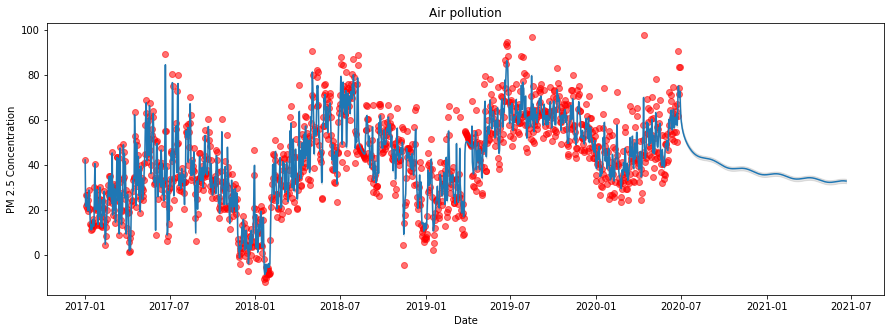

In [125]:
# Plot
fig = plt.figure(figsize=(15,5))
plt.plot(dt_clim_Df.index, y, 'o', color='red', alpha=0.55)
plt.plot(X_date, y_pred)
plt.fill_between(X_date, y_pred-y_std, y_pred+y_std, alpha=0.1, color='k')
#plt.xlim(X_.min(), X_.max())
plt.xlabel("Date")
plt.ylabel("PM 2.5 Concentration")
plt.title("Air pollution")
plt.show()

In [67]:
comb_kerbel = kernels.ExpSineSquared(periodicity=10.0) + kernels.DotProduct(sigma_0=1.0) + kernels.WhiteKernel()

In [ ]:
k1 = 59.3**2 * RBF(length_scale=390)

<html>
 <head>
 </head>
 <body>
             <a id='3c'></a>
     <p style="color:blue;font-size:18px"> <i>3.c custom kernels</i></p>
     <p> &emsp; &#x2022; This custom kerneles is developed by <a href="http://gaussianprocess.org/gpml/chapters/RW.pdf" target="_blank">Rasmussen and Williams (2006)</a></p>
     <p> &emsp; &#x2022; They combined several kernels altogether, from multiple RBF kernels (which is the most popular single kernel), quadratic, periodic, and white noises to pick general patterns that are tipically exist in time-series data: periodic, long-term increase, Medium and Short Term Irregularities, and noise</p>
     <p> &emsp; &#x2022; Their costum kernel seems quite popular, for example, to forecast rising of CO2 concentration (<a href="https://towardsdatascience.com/gaussian-process-kernels-96bafb4dd63e" target="_blank">Towardsdatascience blog</a>)</p>
     <p></p>
     <br/>
 </body>
</html>

In [86]:
k1 = 59.3**2 * kernels.RBF(length_scale=390)
k2 = 2.33**2 * kernels.RBF(length_scale=2.33e+03) * kernels.ExpSineSquared(length_scale=1.26, periodicity=1.09) 
k3 = 0.596**2 * kernels.RationalQuadratic(alpha=0.145, length_scale=4.74)
k4 = 0.183**2 * kernels.RBF(length_scale=0.133) + kernels.WhiteKernel(noise_level=0.0111)

comb_kerbel = k1 + k2 + k3 + k4

In [110]:
k1 = 50.0 * kernels.RBF(length_scale=50.0)
k2 = 2.0**2 * kernels.RBF(length_scale=100.0) * kernels.ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds='fixed')
k3 = 0.5**2 * kernels.RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * kernels.RBF(length_scale=0.1) + kernels.WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-5, np.inf))

comb_kerbel = k1 + k2 + k3 + k4

In [111]:
gp = GaussianProcessRegressor(kernel=comb_kerbel)

X = np.linspace(0, len(dt_clim_Df.PM25), len(dt_clim_Df.PM25)).reshape(-1,1)
y = np.array(dt_clim_Df.PM25)

gp.fit(X, y)

print("\nLearned kernel:", gp.kernel_)
print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))

/Users/ismail/opt/anaconda3/envs/python39/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



Learned kernel: 0.00804**2 * RBF(length_scale=0.00851) + 15.2**2 * RBF(length_scale=97.4) * ExpSineSquared(length_scale=2.05e+03, periodicity=1) + 26.1**2 * RationalQuadratic(alpha=0.0443, length_scale=0.987) + 0.0479**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=1e-05)
Log-marginal-likelihood: -4873.086


In [112]:
n_future = 1*356

X_ = np.linspace(X.min(), X.max()+n_future, len(dt_clim_Df.PM25)+n_future)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

X_date = np.append(dt_clim_Df.index, 
          pd.date_range(start=dt_clim_Df.index[-1]+pd.DateOffset(1), 
              periods=n_future, freq='D'))

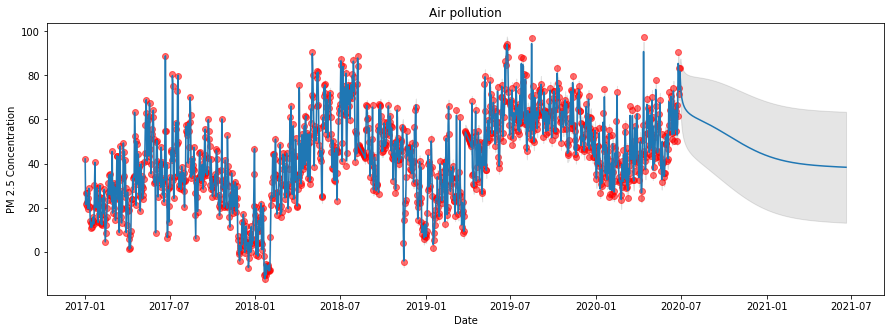

In [113]:
# Plot
fig = plt.figure(figsize=(15,5))
plt.plot(dt_clim_Df.index, y, 'o', color='red', alpha=0.55)
plt.plot(X_date, y_pred)
plt.fill_between(X_date, y_pred-y_std, y_pred+y_std, alpha=0.1, color='k')
#plt.xlim(X_.min(), X_.max())
plt.xlabel("Date")
plt.ylabel("PM 2.5 Concentration")
plt.title("Air pollution")
plt.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:#8f00ff"> <b>Results</b></p>
     <p> &emsp; &#x2022; GP model with custom kernel fit the observed data very well, which can actually mean <b>overfitting</b> or fitting the noise</p>
     <p> &emsp; &#x2022; but this is not so good for multi years forecasting. maybe 3-year training data still short?</p>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
          <a id='4.'></a>
     <p style="color:blue;font-size:20px"> 4. Interactive chart</p>
     <br/>
     <br/>
             <a id='4a'></a>
     <p style="color:blue;font-size:18px"> <i>4.a LSTM model</i></p>
     <br/>
     <br/>
 </body>
</html>

In [31]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [33]:
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
from scipy import stats
import scipy

def smy_OLS(x,y):
    

    x = np.array(x)
    y = np.array(y)
    
    # merging them into 2D array
    xy = np.dstack((x, y))
    
    # remove row with missing values
    xy = xy[0][~np.any(np.isnan(xy[0]), axis=1)]
    
    # making regression model
    model = stats.linregress(xy)
    
    y_pred = model.intercept + model.slope * x
    residual = y_pred - y
    x_mean = np.nanmean(x)
    n = x.size
    
    std_error = (np.sum(residual**2) / (n-2))**.5
    t = stats.t.ppf(0.975, n-2)
    
    x_data = np.linspace(np.nanmin(x), np.nanmax(x), 20)
    y_data = model.intercept + model.slope * x_data
    
    #print(model.intercept)
    
    ci = t * std_error * \
        (1/n + (x_data - x_mean)**2 / \
         np.sum((x_data - x_mean)**2))**.5
    
    C95_u = y_data - ci
    C95_l = y_data + ci
    
    x_data_b = np.append(x_data, np.flip(x_data))
    y_data_b = np.append(C95_u, np.flip(C95_l))
    
    return np.dstack((x_data, y_data)), round(model.rvalue**2, 2), np.dstack((x_data_b, y_data_b))

In [34]:
# get the original data

dt_clim_Df = pd.read_csv(WD + 'polutan_climate_jakarta.csv')
dt_clim_Df['datetime'] = pd.to_datetime(dt_clim_Df['datetime'])
dt_clim_Df.set_index('datetime', inplace=True)

df_forecast = dt_clim_Df['2020-01-01':'2020-12-31']
df_forecast.head()

,precip,tmin,tmax,dew,press,uwind,vwind,PM25
datetime,,,,,,,,
2020-01-01,0.020513,297.253479,300.135712,296.860901,100869.304688,1.119835,0.505369,35.333333
2020-01-02,0.008962,297.894958,303.123352,297.054291,100820.648438,1.902582,-0.075082,32.875000
2020-01-03,0.013690,298.319061,303.134613,297.121307,100619.476562,2.483949,-0.187293,42.166667
2020-01-04,0.011872,298.391785,303.250610,297.450043,100497.789062,2.446240,-0.574933,40.166667
2020-01-05,0.009166,298.008545,301.643768,297.138031,100568.781250,2.410891,-0.354594,48.125000


<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Get the forescated data from 1-week lag</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [32]:
LSTM_1W = pd.read_csv('temp_lstm_result_1week.csv')
LSTM_1W['date'] = pd.to_datetime(LSTM_1W['date'])
LSTM_1W.set_index('date', inplace=True)

LSTM_1W.head()

,PM25_1W
date,
2020-01-08,35.975650
2020-01-09,46.562218
2020-01-10,32.991060
2020-01-11,30.339108
2020-01-12,33.769917


In [69]:
warna_1 = 'blue'
warna_2 = 'violet'

In [72]:
# 1st component of the figure
# observed data

fig_Obs =  go.Scatter(
        x=df_forecast.index, y=df_forecast['PM25'],
        line=dict(width=1, 
                    color=warna_2),
        name='Observed'
) 

# 2nd component
# predicted by 1-week lag

fig_1W =  go.Scatter(
        x=LSTM_1W.index, y=LSTM_1W['PM25_1W'],
        line=dict(width=1, 
                    color=warna_1),
        name='Forecasted (1-week)'
)

# 3rd component
# scatter plot

fig_1Ws =  go.Scatter(
        x=df_forecast['PM25'][7:], 
        y=LSTM_1W['PM25_1W'],
        mode = 'markers',
        marker=dict(color=warna_2),
        name='Obs. vs Forecasted PM 2.5'
)

# 4rd component
# trendline

W1_tl, W1_r, W1_ci= smy_OLS(df_forecast['PM25'][7:], LSTM_1W['PM25_1W'])

# component for trendline

fig_1Ws_td =  go.Scatter(
        x=W1_tl[0][:,0].tolist(), 
        y=W1_tl[0][:,1].tolist(),
    mode='lines',
        line=dict(width=0.7, dash='dash',
                    color=warna_1),
        name='trendline'
)

fig = make_subplots(rows=1, cols=2, 
                    column_widths=[0.7, 0.4], horizontal_spacing = 0.05)

fig.add_trace(fig_Obs, row = 1, col = 1)

fig.add_trace(fig_1W, row = 1, col = 1)

fig.add_trace(fig_1Ws, row = 1, col = 2)

fig.add_trace(fig_1Ws_td, row = 1, col = 2)

fig.update_layout(
    title="LSTM for forecasting PM 2.5 polutant concentration using climate data",
    xaxis_title="Time",
    yaxis_title="PM 2.5 Concentration",
    autosize=False,
    width=950,
    height=400,
    yaxis2=dict(range=[0,100]),
    xaxis2=dict(range=[0,100]),
    xaxis_range=[df_forecast.index[0],df_forecast.index[-1]]
)

fig.show()

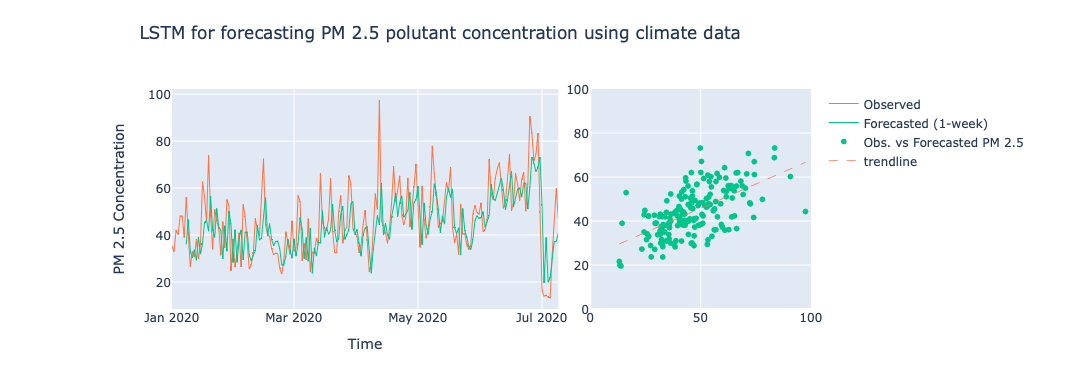

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Get the forescated data from 2-week lag</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [59]:
LSTM_2W = pd.read_csv('temp_lstm_result_2week.csv')
LSTM_2W['date'] = pd.to_datetime(LSTM_2W['date'])
LSTM_2W.set_index('date', inplace=True)

LSTM_2W.head()

,PM25_2W
date,
2020-01-15,37.326850
2020-01-16,37.522020
2020-01-17,42.677230
2020-01-18,42.035553
2020-01-19,42.865967


In [74]:
# 1st component
# predicted by 2-week lag

fig_2W =  go.Scatter(
        x=LSTM_1W.index, y=LSTM_2W['PM25_2W'],
        line=dict(width=1, 
                    color=warna_1),
        name='Forecasted (2-week)'
)

# 2nd component
# scatter plot

fig_2Ws =  go.Scatter(
        x=df_forecast['PM25'][14:], 
        y=LSTM_2W['PM25_2W'],
        mode = 'markers',
        marker=dict(color=warna_2),
        name='Obs. vs Forecasted PM 2.5'
)

# 3rd component
# trendline

W2_tl, W2_r, W2_ci= smy_OLS(df_forecast['PM25'][14:], LSTM_2W['PM25_2W'])

# component for trendline

fig_2Ws_td =  go.Scatter(
        x=W2_tl[0][:,0].tolist(), 
        y=W2_tl[0][:,1].tolist(),
    mode='lines',
        line=dict(width=0.7, dash='dash',
                    color=warna_1),
        name='trendline'
)

fig = make_subplots(rows=1, cols=2, 
                    column_widths=[0.7, 0.4], horizontal_spacing = 0.05)

fig.add_trace(fig_Obs, row = 1, col = 1)

fig.add_trace(fig_2W, row = 1, col = 1)

fig.add_trace(fig_2Ws, row = 1, col = 2)

fig.add_trace(fig_2Ws_td, row = 1, col = 2)

fig.update_layout(
    title="LSTM for forecasting PM 2.5 polutant concentration using climate data",
    xaxis_title="Time",
    yaxis_title="PM 2.5 Concentration",
    autosize=False,
    width=950,
    height=400,
    yaxis2=dict(range=[0,100]),
    xaxis2=dict(range=[0,100]),
    xaxis_range=[df_forecast.index[0],df_forecast.index[-1]]
)

fig.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Get the forescated data from 4-week lag</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [76]:
LSTM_4W = pd.read_csv('temp_lstm_result_4week.csv')
LSTM_4W['date'] = pd.to_datetime(LSTM_4W['date'])
LSTM_4W.set_index('date', inplace=True)

# 1st component
# predicted by 2-week lag

fig_4W =  go.Scatter(
        x=LSTM_4W.index, y=LSTM_4W['PM25_4W'],
        line=dict(width=1, 
                    color=warna_1),
        name='Forecasted (4-week)'
)

# 2nd component
# scatter plot

fig_4Ws =  go.Scatter(
        x=df_forecast['PM25'][14:], 
        y=LSTM_4W['PM25_4W'],
        mode = 'markers',
        marker=dict(color=warna_2),
        name='Obs. vs Forecasted PM 2.5'
)

# 3rd component
# trendline

W4_tl, W4_r, W4_ci= smy_OLS(df_forecast['PM25'][31:], LSTM_4W['PM25_4W'])

# component for trendline

fig_4Ws_td =  go.Scatter(
        x=W4_tl[0][:,0].tolist(), 
        y=W4_tl[0][:,1].tolist(),
    mode='lines',
        line=dict(width=0.7, dash='dash',
                    color=warna_1),
        name='trendline'
)

fig = make_subplots(rows=1, cols=2, 
                    column_widths=[0.7, 0.4], horizontal_spacing = 0.05)

fig.add_trace(fig_Obs, row = 1, col = 1)

fig.add_trace(fig_4W, row = 1, col = 1)

fig.add_trace(fig_4Ws, row = 1, col = 2)

fig.add_trace(fig_4Ws_td, row = 1, col = 2)

fig.update_layout(
    title="LSTM for forecasting PM 2.5 polutant concentration using climate data",
    xaxis_title="Time",
    yaxis_title="PM 2.5 Concentration",
    autosize=False,
    width=950,
    height=400,
    yaxis2=dict(range=[0,100]),
    xaxis2=dict(range=[0,100]),
    xaxis_range=[df_forecast.index[0],df_forecast.index[-1]]
)

fig.show()

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Lets combine them in 1 interactive chart</p>
      <p> &emsp; &#x2022; </p>
     <br/>
 </body>
</html>

In [80]:
# put all the figure component sinto 1 big picture

fig = make_subplots(rows=1, cols=2, 
                    column_widths=[0.7, 0.4],
                   horizontal_spacing = 0.05)

# left graph

fig.add_trace(fig_Obs, row = 1, col = 1)

fig.add_trace(fig_1W, row = 1, col = 1)

fig.add_trace(fig_2W, row = 1, col = 1)


fig.add_trace(fig_4W, row = 1, col = 1)


# right graph


fig.add_trace(fig_1Ws, row = 1, col = 2)

fig.add_trace(fig_1Ws_td, row = 1, col = 2)


fig.add_trace(fig_2Ws, row = 1, col = 2)

fig.add_trace(fig_2Ws_td, row = 1, col = 2)



fig.add_trace(fig_4Ws, row = 1, col = 2)

fig.add_trace(fig_4Ws_td, row = 1, col = 2)




W1_rr = [dict(x=0.1, y=0.9,
                xref="paper", yref="paper",
                text="RMSE = 9.26",
             ax=0, ay=0)]


W2_rr = [dict(x=0.1, y=0.9,
                xref="paper", yref="paper",
                text="RMSE = 10.74",
            ax=0, ay=0)]


W4_rr = [dict(x=0.1, y=0.9,
                xref="paper", yref="paper",
                text="RMSE = 13.61",
            ax=0, ay=0)]

# this is to hide some graphs component for first inilisation
# otherwise, all graphs is shown up at the beginnign despite selection in dropdown
# traces start at 0
for k in [2, 3, 6, 7, 8, 9]:
    fig.update_traces(visible=False, selector=k)

# dropdown menu
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = '1W',
                  method = 'update',
                  args = [{'visible': [True, True, False, False,
                                      True, True, False, False, False, False]},
                          {'title': '1-week lag',
                           'showlegend':True, "annotations": W1_rr}]),
             dict(label = '2W',
                  method = 'update',
                  args = [{'visible': [True, False, True, False,
                                      False, False, True, True, False, False]},
                          {'title': '2-week lag',
                           'showlegend':True, "annotations": W2_rr}]),
             dict(label = '4W',
                  method = 'update',
                  args = [{'visible': [True, False, False, True,
                                      False, False, False, False, True, True]},
                          {'title': '4-week lag',
                           'showlegend':True, "annotations": W4_rr}])
            ])
        )
    ],
    title="LSTM for forecasting PM 2.5 polutant concentration using climate data",
    xaxis_title="Time",
    yaxis_title="PM 2.5 Concentration",
    autosize=False,
    width=950,
    height=400,
    yaxis2=dict(range=[0,100]),
    xaxis2=dict(range=[0,100]),
    xaxis_range=[df_forecast.index[0],df_forecast.index[-1]]
)

fig.show()

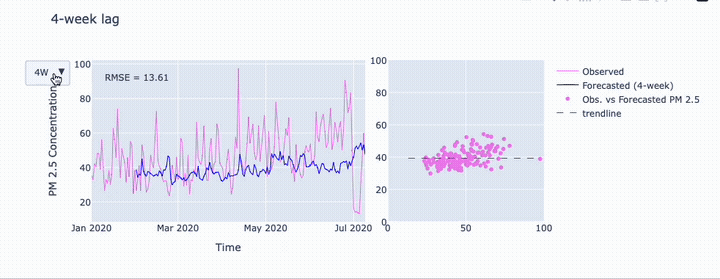

<html>
 <head>
 </head>
 <body>
     <p style="color:brown">Lets publish in Datapane</p>
      <p> &emsp; &#x2022; published chart is available here at <a href="https://cloud.datapane.com/reports/dA610mk/interactive-chart-machine-learning-lstm-for-forecasting-air-pollution/"  target="_blank">Datapane.com</a></p>
     <br/>
 </body>
</html>

In [79]:
import datapane as dp

In [81]:
dp.upload_report(
    [
        dp.Plot(fig),
        dp.Text("How the number of lags affect the forecasting of LSTM neural network")
    ],
    name="Interactive chart - machine Learning LSTM for forecasting air pollution"
)

Uploading report and associated data - *please wait...*

Report successfully uploaded - view and share at <a href='https://cloud.datapane.com/reports/dA610mk/interactive-chart-machine-learning-lstm-for-forecasting-air-pollution/' target='_blank'>here</a>.

Uploaded Report - view at https://cloud.datapane.com/reports/dA610mk/interactive-chart-machine-learning-lstm-for-forecasting-air-pollution/